# **Dimensionality Reduction**

### **Pengurangan dimensi adalah proses pengurangan jumlah variabel atau atribut acak yang sedang dipertimbangkan. Reduksi data berdimensi tinggi, sebagai bagian dari langkah pra-pemrosesan data, sangat penting dalam banyak aplikasi dunia nyata. Pengurangan dimensi tinggi telah muncul sebagai salah satu tugas penting dalam aplikasi data mining. Misalnya, Anda mungkin memiliki kumpulan data dengan ratusan fitur (kolom di database Anda). Kemudian reduksi dimensionalitas adalah Anda mengurangi fitur atribut data tersebut dengan menggabungkan atau menggabungkannya sedemikian rupa sehingga tidak akan kehilangan banyak karakteristik signifikan dari dataset asli. Salah satu masalah utama yang terjadi dengan data berdimensi tinggi secara luas dikenal sebagai "Curse of Dimensionality". Ini mendorong kami untuk mengurangi dimensi data kami jika kami ingin menggunakannya untuk analisis.**


## **Import Library & Dataset**

#### **Sumber Dataset: https://www.kaggle.com/mathchi/diabetes-data-set**

In [203]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [204]:
os.environ['KAGGLE_USERNAME'] = "akmalzuhdyprasetya"
os.environ['KAGGLE_KEY'] = "3f1fd1ffa5d36294293dfb098b3b7392"

In [205]:
!kaggle datasets download -d mathchi/diabetes-data-set

diabetes-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [206]:
!unzip -q /content/diabetes-data-set.zip

replace diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [207]:
data = pd.read_csv("/content/diabetes.csv")
data.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


## **Pre-Processing**

In [208]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [209]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [210]:
cleanup_nums = {"Outcome": {0:0.0, 1:1.0}}
data.replace(cleanup_nums, inplace=True)
data.head(11)
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                     float64
dtype: object

In [211]:
x = data.drop("Outcome", 1)
y = data["Outcome"]
data.head(11)
print(x)
column_name = list(x.columns)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [212]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [213]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(x)

In [214]:
print('Min : ', data_scaled.min(axis=0))
print('Max : ', data_scaled.max(axis=0))

Min :  [0. 0. 0. 0. 0. 0. 0. 0.]
Max :  [1. 1. 1. 1. 1. 1. 1. 1.]


In [215]:
data_new = pd.DataFrame(data=data_scaled, columns= column_name)
data_new.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000


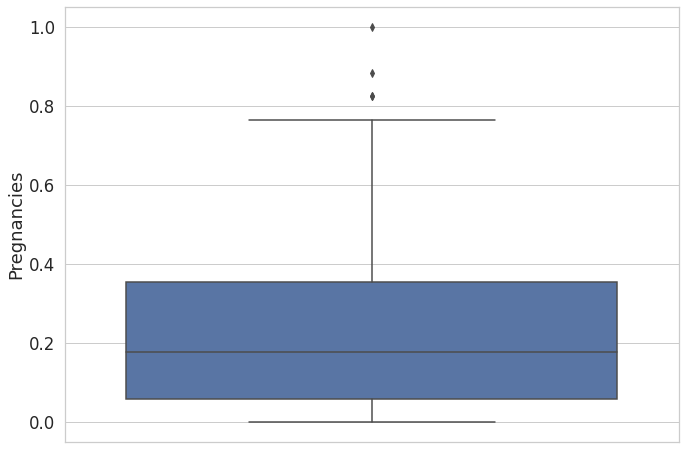

In [216]:
import seaborn as sns
sns.boxplot(y = data_new['Pregnancies'])

In [217]:
data_new = pd.concat([data_new, y], axis = 1)
data_new.head(11)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
5,0.294118,0.582915,0.606557,0.000000,0.000000,0.381520,0.052519,0.150000,0.0
6,0.176471,0.391960,0.409836,0.323232,0.104019,0.461997,0.072588,0.083333,1.0
7,0.588235,0.577889,0.000000,0.000000,0.000000,0.526080,0.023911,0.133333,0.0
8,0.117647,0.989950,0.573770,0.454545,0.641844,0.454545,0.034159,0.533333,1.0
9,0.470588,0.628141,0.786885,0.000000,0.000000,0.000000,0.065756,0.550000,1.0


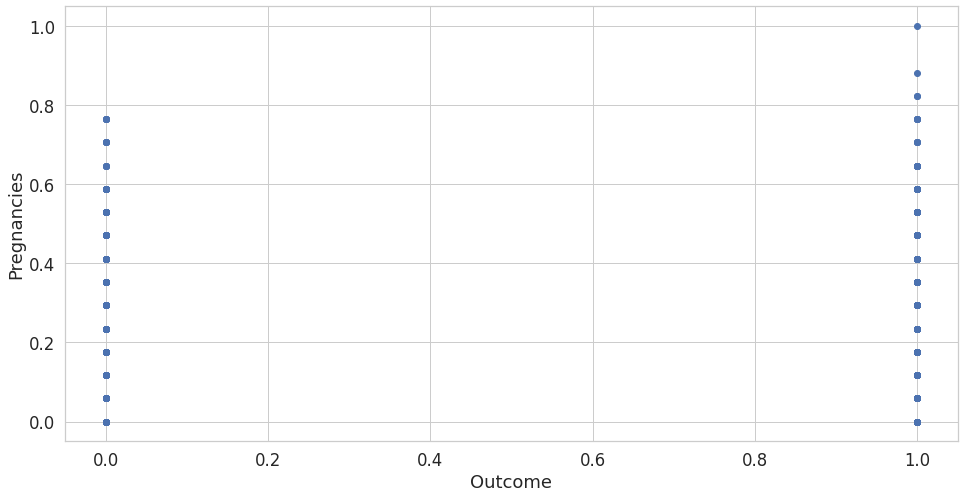

In [218]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_new['Outcome'], data_new['Pregnancies'])
ax.set_xlabel('Outcome')
ax.set_ylabel('Pregnancies')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

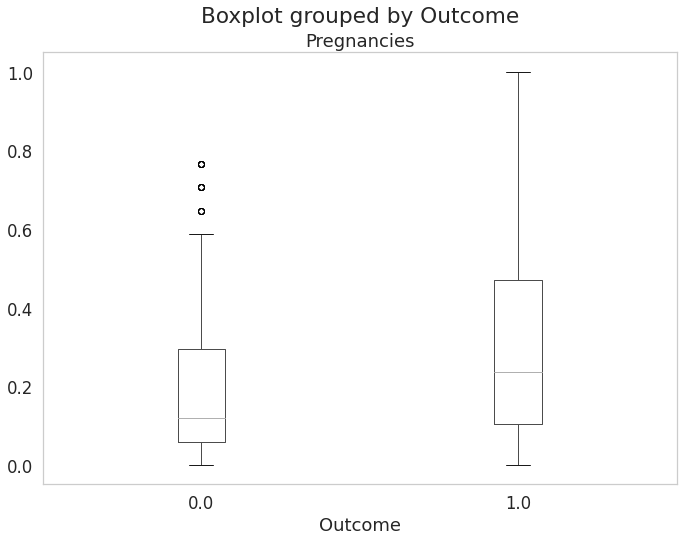

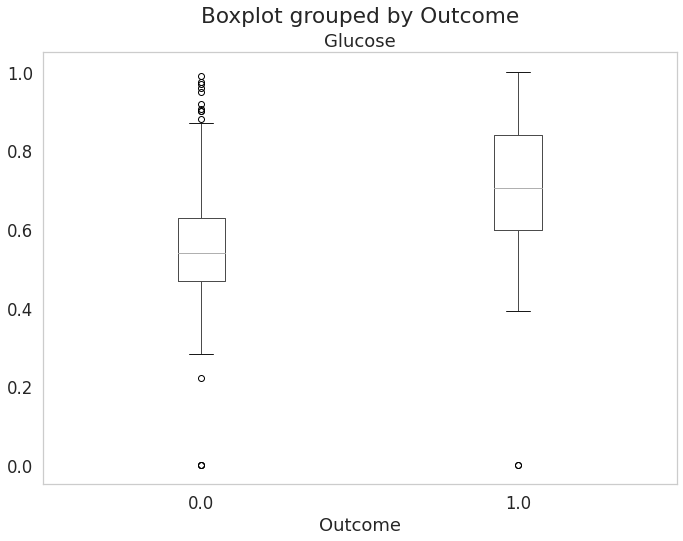

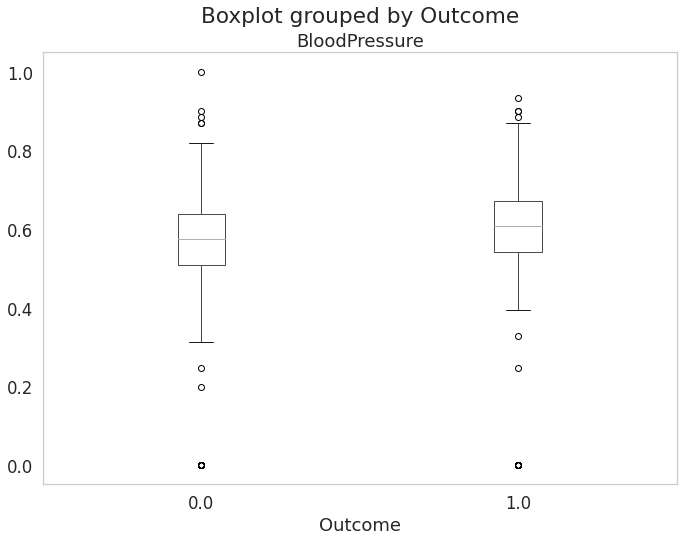

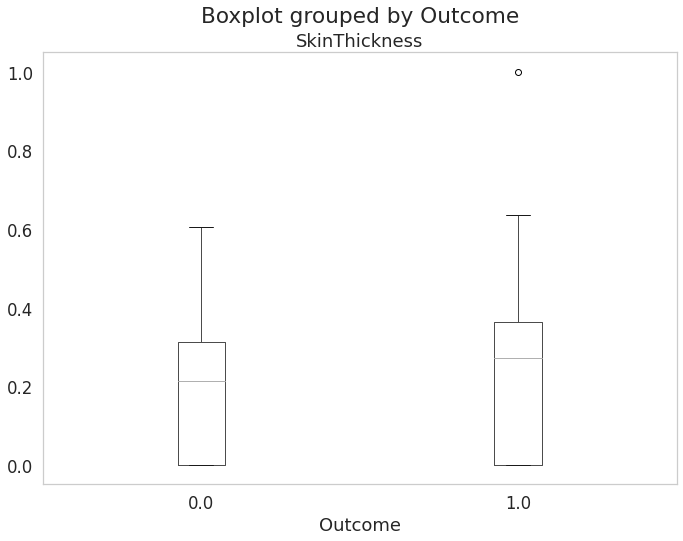

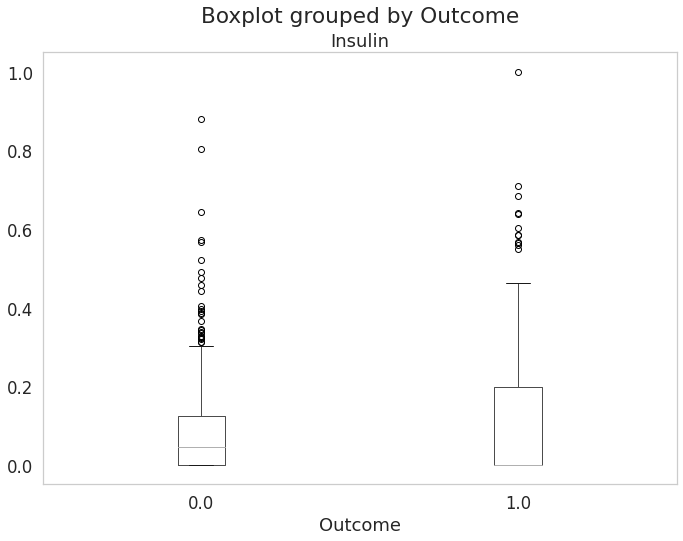

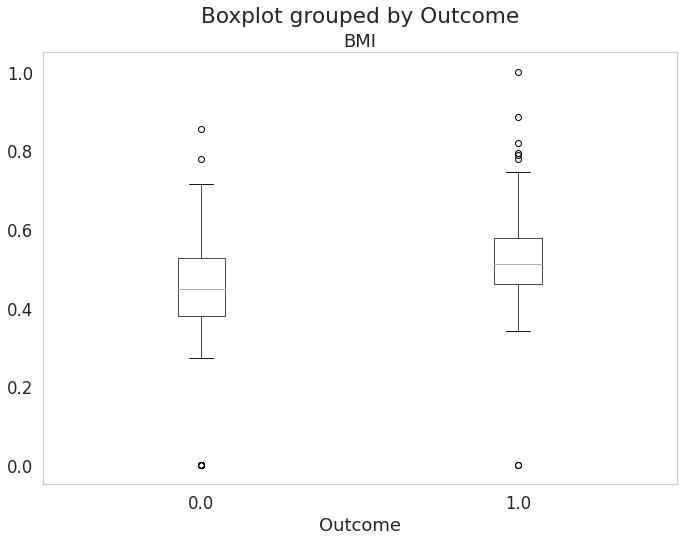

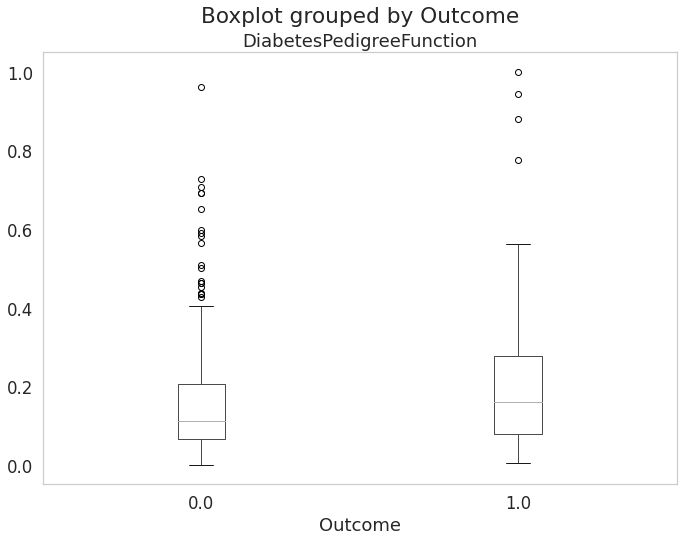

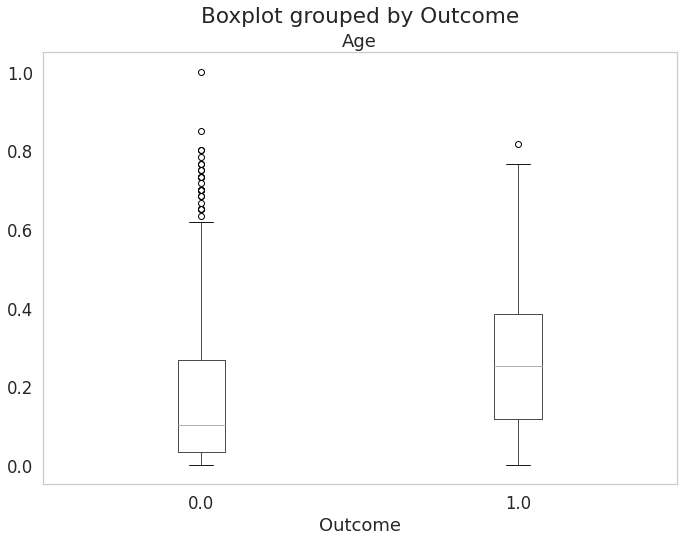

In [219]:
sns.set(rc={'figure.figsize':(11, 8)}, font_scale=1.5, style='whitegrid')

x = data_new.drop("Outcome", 1)
columns_name = list(x.columns)

for i in column_name:
  data_new.boxplot(by ='Outcome', column =[i], grid = False) 
  

In [220]:
Q1 = data_new.quantile(0.25)
Q3 = data_new.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
data_new.shape

Pregnancies                 0.294118
Glucose                     0.207286
BloodPressure               0.147541
SkinThickness               0.323232
Insulin                     0.150414
BMI                         0.138599
DiabetesPedigreeFunction    0.163322
Age                         0.283333
Outcome                     1.000000
dtype: float64


(768, 9)

In [221]:
data_out = data_new[~((data_new < (Q1 - 1.5 * IQR)) |(data_new > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data_out.shape)

(639, 9)


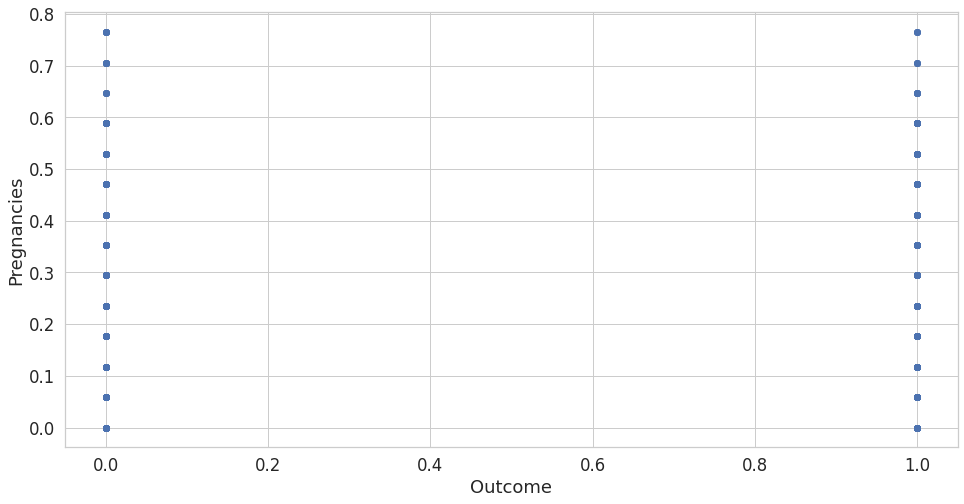

In [222]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_out['Outcome'], data_out['Pregnancies'])
ax.set_xlabel('Outcome')
ax.set_ylabel('Pregnancies')
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

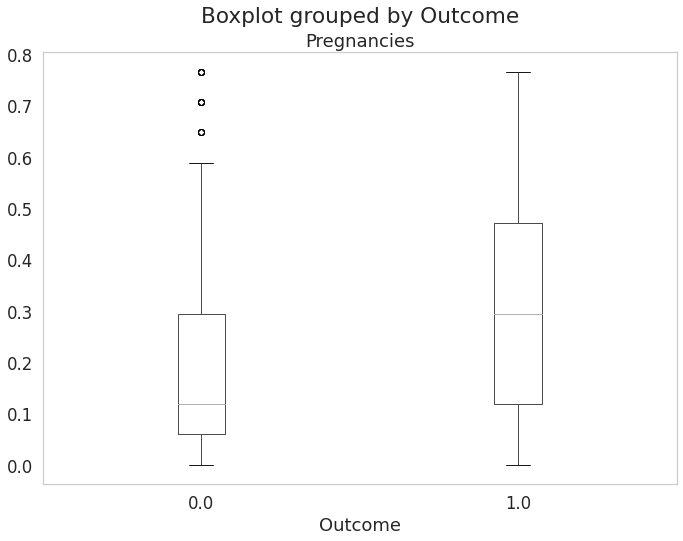

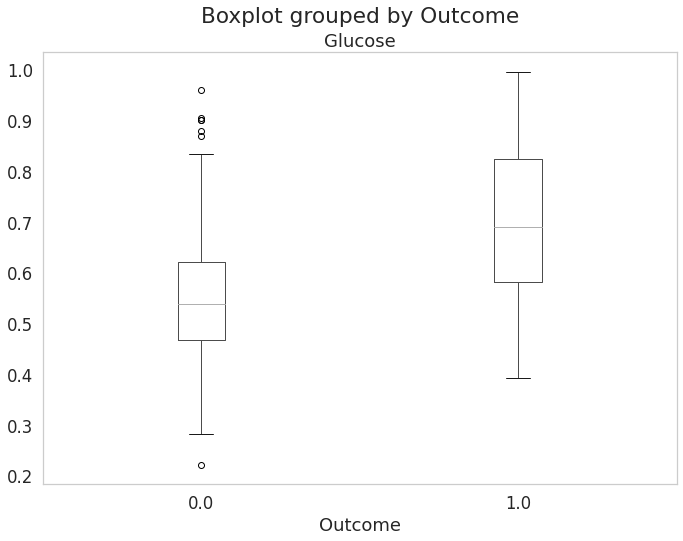

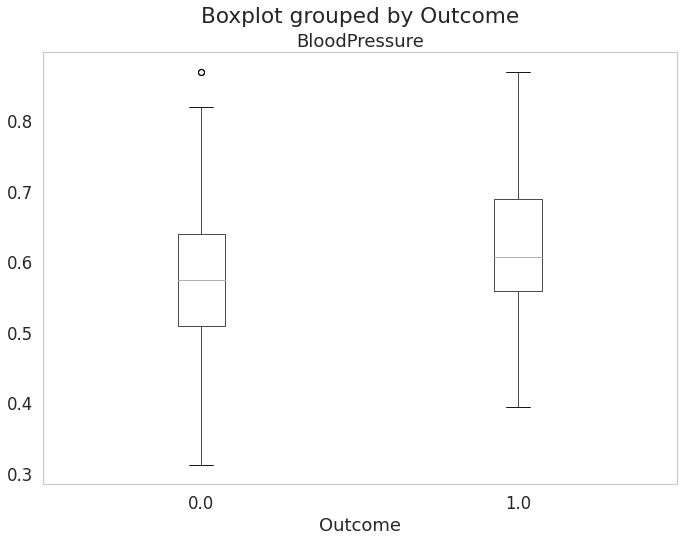

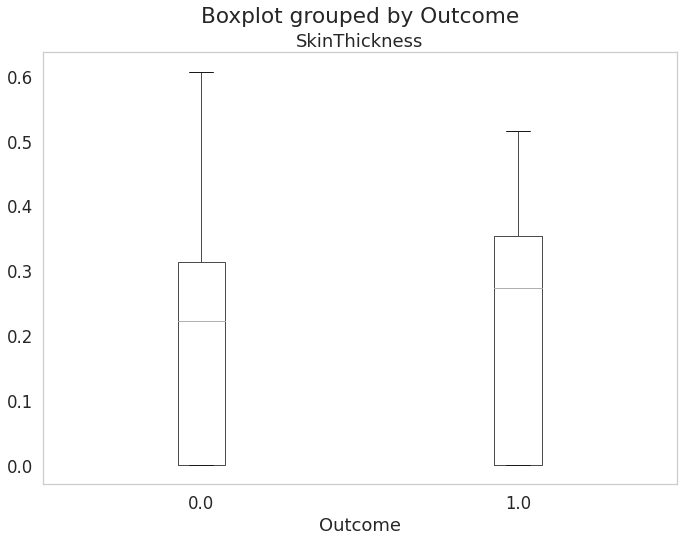

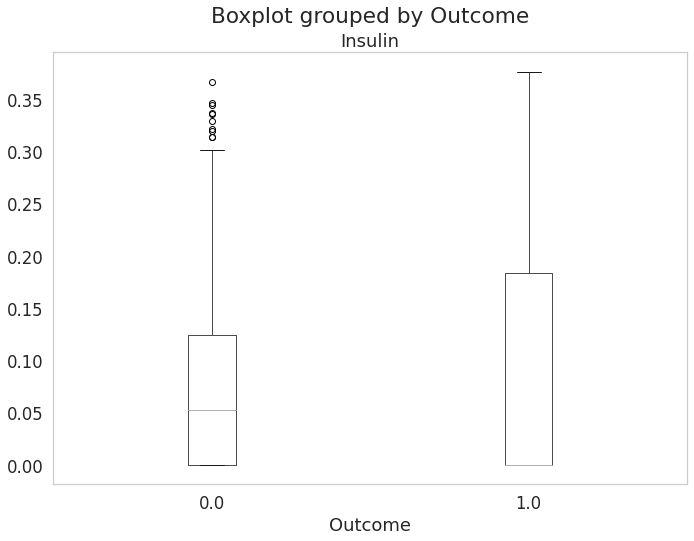

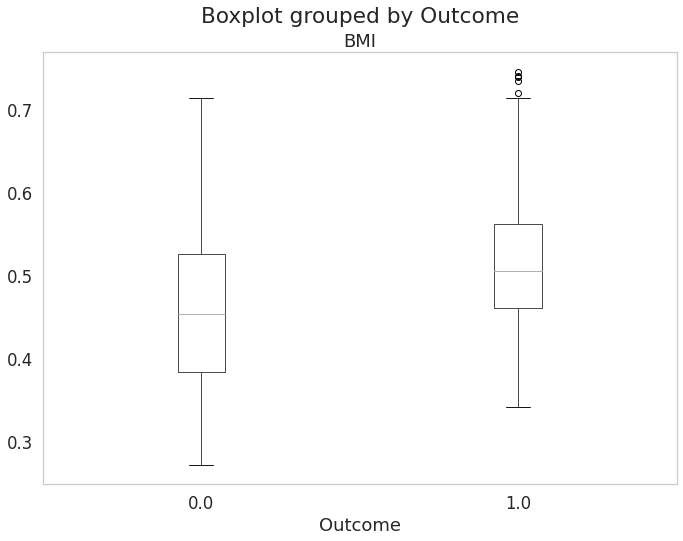

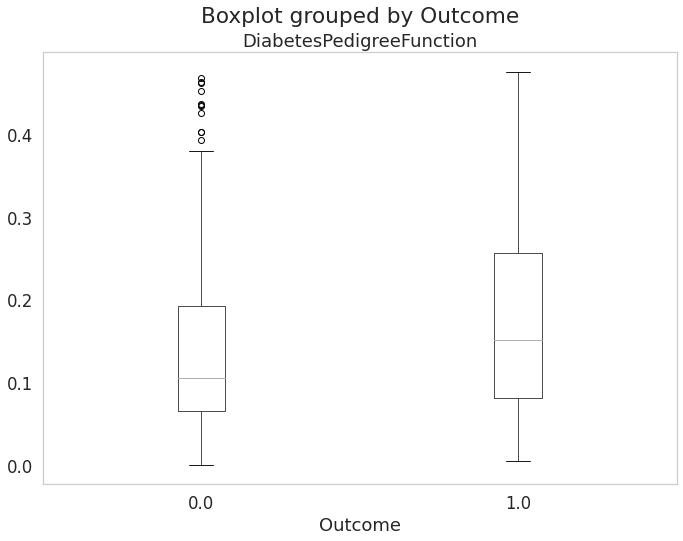

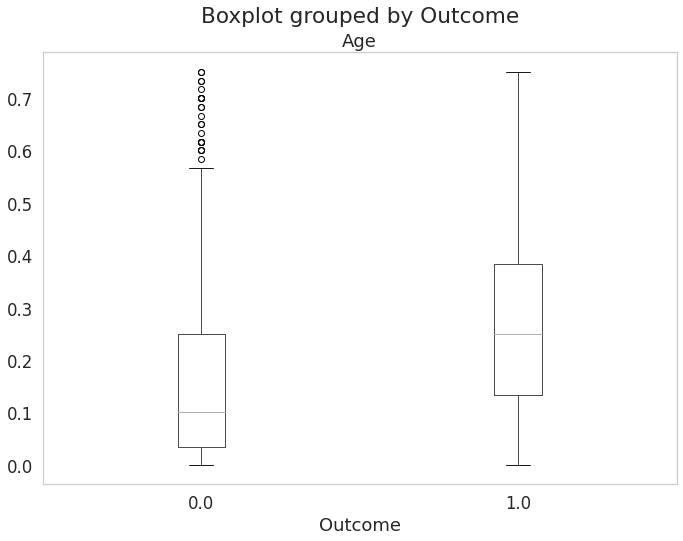

In [223]:
x_fix = data_out.drop("Outcome", 1)
y_fix = data_out["Outcome"]
columns_name = list(x_fix.columns)

for i in column_name:
  data_out.boxplot(by ='Outcome', column =[i], grid = False)
  

## **Feature Selection**

### **1. Univariate Selection**

<img src='https://drive.google.com/uc?id=1g7jNdIy6QiW-oMgc1y3Q3LTSB-k3eYL2'>

In [224]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

x = data_out.iloc[:,0:8]  #independent columns
y = data_out.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

bestfeatures = SelectKBest(score_func=chi2, k=8)

fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
p_values = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(x_fix.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores, p_values],axis=1)
featureScores.columns = ['Feature','chi-square Score', 'p-values']  #naming the dataframe columns
print(featureScores.nlargest(77,'chi-square Score'))  #print 10 best features

                    Feature  chi-square Score  p-values
7                       Age          7.728539  0.005435
1                   Glucose          5.557573  0.018401
0               Pregnancies          5.452638  0.019539
6  DiabetesPedigreeFunction          1.566623  0.210698
5                       BMI          0.892340  0.344844
4                   Insulin          0.691906  0.405517
2             BloodPressure          0.313768  0.575377
3             SkinThickness          0.069395  0.792220


### **2. SVM-RFE**

In [225]:
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [226]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import RFE
from operator import itemgetter

x = data_out.iloc[:,0:8]
y = data_out.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, 
                                                    stratify = y)

colnames = x.columns
n_features_to_select = 1
svclassifier = SVC(kernel='linear')
rfe = RFE(svclassifier, n_features_to_select, verbose = 1)
rfe.fit(x, y)

y_pred = rfe.predict(x)

ranks[f"RFE score"] = ranking(list(map(float, rfe.ranking_)), colnames, 
                              order=-1)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [227]:
# Put the mean scores into a Pandas dataframe
data_rank = pd.DataFrame(list(ranks[f"RFE score"].items()), columns= ['Feature','Scores'])

# Sort the dataframe
data_rank = data_rank.sort_values('Scores', ascending=False)

In [228]:
data_rank

,Feature,Scores
1,Glucose,1.00
5,BMI,0.86
6,DiabetesPedigreeFunction,0.71
0,Pregnancies,0.57
4,Insulin,0.43
7,Age,0.29
2,BloodPressure,0.14
3,SkinThickness,0.00


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


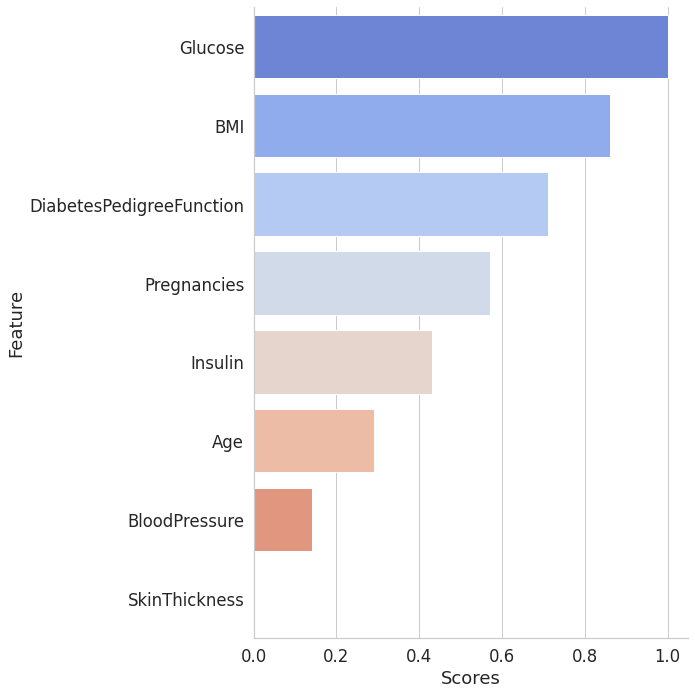

In [229]:
# Let's plot the ranking of the features
sns.factorplot(x="Scores", y="Feature", data = data_rank, kind="bar", size=10, 
               aspect=1, palette='coolwarm')

### **3. Extratrees**

In [230]:
from sklearn.ensemble import ExtraTreesClassifier

[0.11320123 0.23266804 0.09847701 0.07927162 0.07410833 0.1417469
 0.11986844 0.14065844]


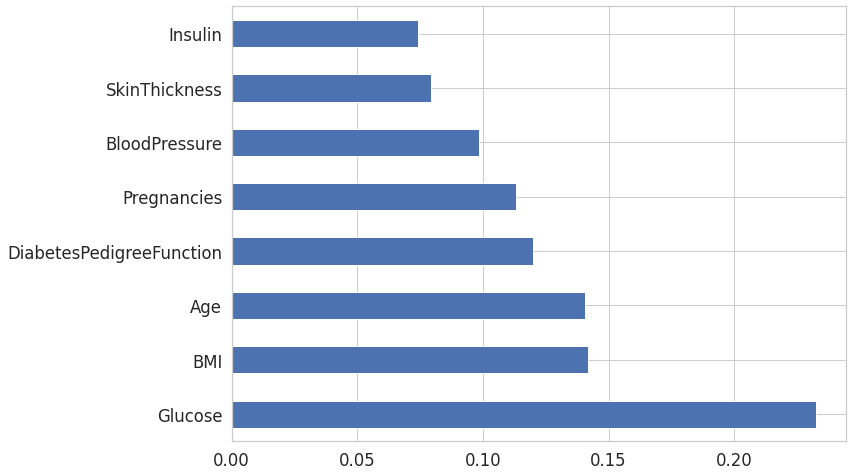

In [231]:
model = ExtraTreesClassifier()
model.fit(x_fix,y_fix)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### **4. Correlation Matrix with Heatmap**

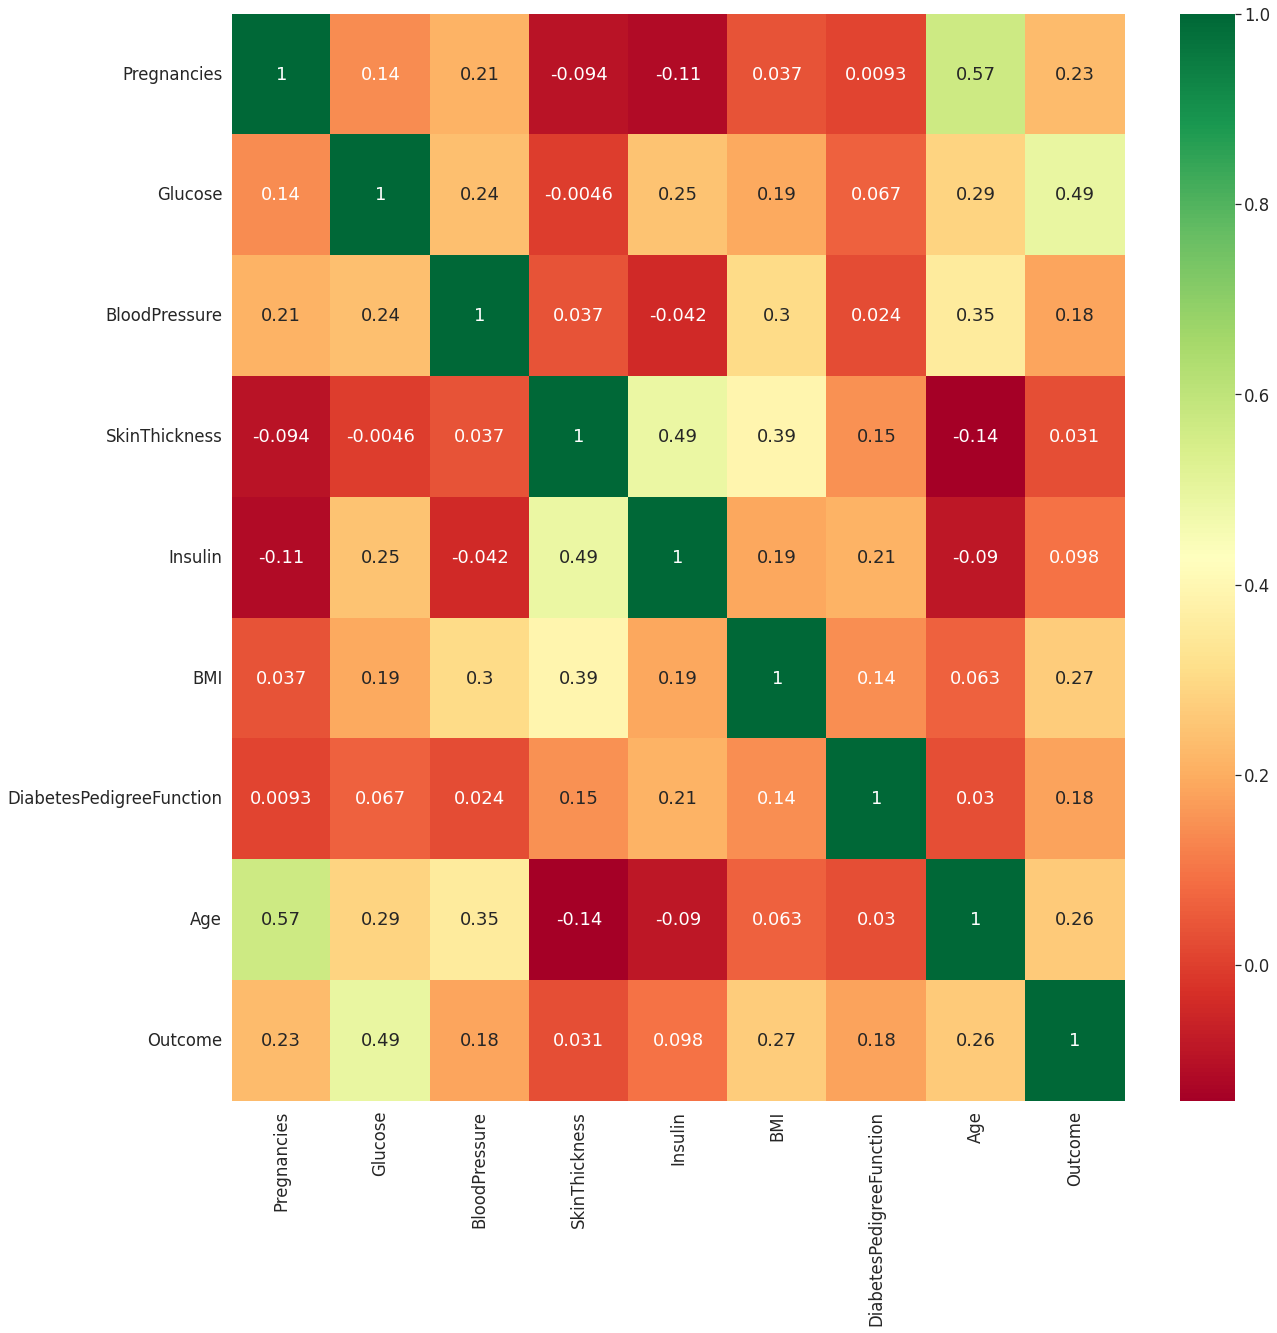

In [232]:
x = data_out.iloc[:,0:8]  #independent columns
y = data_out.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset

corrmat = data_out.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data_out[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## **Feature Extraction**

### **1. LDA**

In [235]:
#first reduxe de dimensin
from sklearn import manifold, datasets, decomposition, discriminant_analysis

lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(x, y)

lda_data = pd.DataFrame(data = lda
             , columns = ['new_var'])
finalData = pd.concat([lda_data, y_fix], axis = 1)
finalData.head(11)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(8, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


,new_var,Outcome
0,1.664330,1.0
1,-1.653360,0.0
2,2.290934,1.0
3,-1.861267,0.0
4,-0.560594,NaN
5,-1.657943,0.0
6,-0.211273,1.0
7,2.681278,NaN
8,1.458087,NaN
9,0.282419,NaN


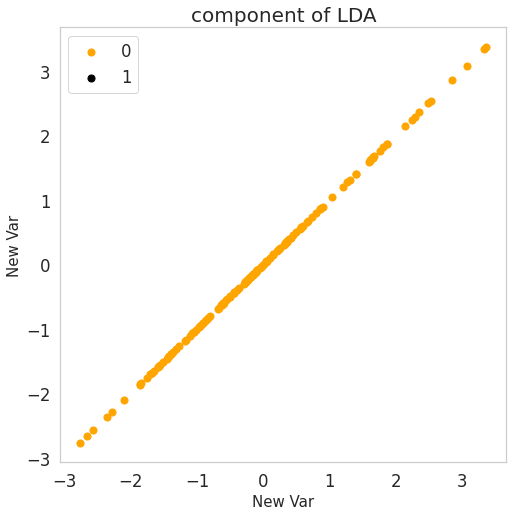

In [236]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('New Var', fontsize = 15)
ax.set_ylabel('New Var', fontsize = 15)
ax.set_title('component of LDA', fontsize = 20)
targets = [1.0,2.0]
colors = ['orange', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = finalData['Outcome'] == target
    ax.scatter(finalData.loc[indicesToKeep, 'new_var']
               , finalData.loc[indicesToKeep, 'new_var']
               , c = color
               , s = 50)
ax.legend(["0", "1"])
ax.grid()

### **2. PCA**

In [237]:
#first reduxe de dimensin
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_fix)
principalData = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalData = pd.concat([principalData, y_fix], axis = 1)
finalData.head(11)

,principal component 1,principal component 2,Outcome
0,0.297668,0.170362,1.0
1,-0.185873,-0.056571,0.0
2,0.249959,-0.114169,1.0
3,-0.290578,-0.073274,0.0
4,0.045277,-0.244893,NaN
5,-0.196479,-0.016406,0.0
6,0.024788,-0.180464,1.0
7,0.352986,-0.070819,NaN
8,0.296426,0.109815,NaN
9,-0.198836,0.363411,NaN


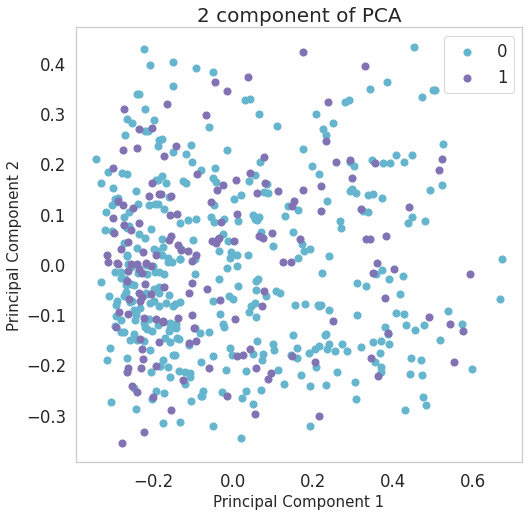

In [242]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component of PCA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = finalData['Outcome'] == target
    ax.scatter(finalData.loc[indicesToKeep, 'principal component 1']
               , finalData.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(["0", "1"])
ax.grid()

### **3. t-SNE**

In [243]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [244]:
x_2d = tsne.fit_transform(x_fix)

In [245]:
x_2d

array([[-12.897391 , -22.989405 ],
       [ -8.254772 ,  10.905355 ],
       [  6.8406057, -34.856346 ],
       ...,
       [  2.6935334,   4.69051  ],
       [ 11.688589 , -30.03692  ],
       [  4.839368 ,  19.903606 ]], dtype=float32)

In [246]:
new_data = pd.DataFrame(data = x_2d, columns = ['feature 1', 'feature 2'])
tsne_data = pd.concat([new_data, y_fix], axis = 1)
tsne_data.head(11)

,feature 1,feature 2,Outcome
0,-12.897391,-22.989405,1.0
1,-8.254772,10.905355,0.0
2,6.840606,-34.856346,1.0
3,-4.279245,17.597397,0.0
4,10.960279,-19.592875,NaN
5,-11.200563,7.597647,0.0
6,12.046011,-23.483192,1.0
7,3.950681,-31.828758,NaN
8,-15.266352,-25.273455,NaN
9,17.079214,17.687300,NaN


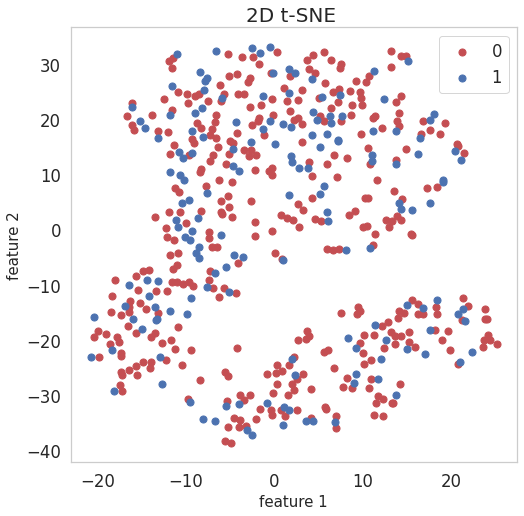

In [247]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('feature 1', fontsize = 15)
ax.set_ylabel('feature 2', fontsize = 15)
ax.set_title('2D t-SNE ', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = tsne_data['Outcome'] == target
    ax.scatter(tsne_data.loc[indicesToKeep, 'feature 1']
               , tsne_data.loc[indicesToKeep, 'feature 2']
               , c = color
               , s = 50)
ax.legend(["0", "1"])
ax.grid()